In [2]:
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.manifold import MDS
import umap.umap_ as umap
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df_data = df
df["y"] = data.target
df_data

n_classes = 3 # depends on the dataset
n_classes = len(  df.y.unique() ) 

/home/gia/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/gia/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/gia/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopyth

In [3]:
from sklearn.datasets import load_digits
data = load_digits()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df_data = df
df["y"] = data.target
df_data


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,y
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


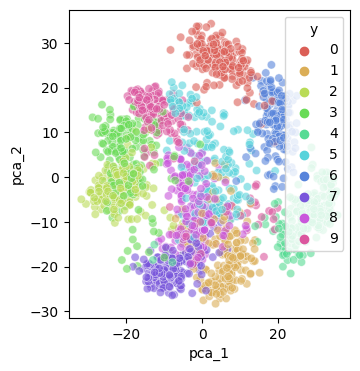

In [8]:
pca_result = PCA(n_components=3).fit_transform(df_data)

df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1] 
df['pca_3'] = pca_result[:, 2]

plt.figure(figsize=(8, 4))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca_1", y="pca_2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.6,
    ax=ax1
)


plt.show()



In [ ]:
mds_res = MDS(n_components=2, metric=True, normalized_stress='auto').fit_transform(df_data)

df['mds0'] = mds_res[:,0]
df['mds1'] = mds_res[:,1]

plt.figure(figsize=(8, 4))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="mds0", y="mds1",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.6,
    ax=ax1
)


plt.show()

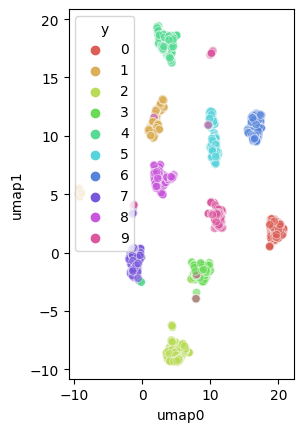

In [5]:
embedding = umap.UMAP(n_neighbors=5, random_state=42).fit(df_data).transform(df_data)
df['umap0'] = embedding[:,0]
df['umap1'] = embedding[:,1]

plt.figure(figsize=(8, 4))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="umap0", y="umap1",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.6,
    ax=ax1
)


plt.show()

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.334s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.766037
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.424751
[t-SNE] KL divergence after 300 iterations: 1.936183


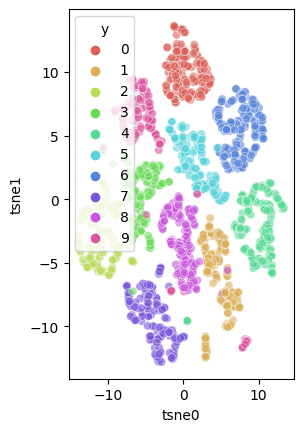

In [7]:
tsne_result = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300).fit_transform(df_data)
df['tsne0'] = tsne_result[:,0]
df['tsne1'] = tsne_result[:,1]

plt.figure(figsize=(8, 4))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="tsne0", y="tsne1",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.6,
    ax=ax1
)


plt.show()